## アンサンブル学習

3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。

- ブレンディング
- バギング
- スタッキング

### 小さなデータセットの用意
以前も利用した回帰のデータセットを用意します。

[House Prices - Advanced Regression Techniques
](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

この中の`train.csv`をダウンロードし、目的変数として`SalePrice`、説明変数として、`GrLivArea`と`YearBuilt`を使います。


train.csvを学習用（train）8割、検証用（val）2割に分割してください。

### scikit-learn
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。


### ベースモデル作成

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(
    "../diveintocode-ml/house-prices-advanced-regression-techniques/train.csv")

In [3]:
test = pd.read_csv(
    "../diveintocode-ml/house-prices-advanced-regression-techniques/test.csv")

In [4]:
display(train.head())
display(test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
X = np.array(train[['GrLivArea', 'YearBuilt']])
y = np.array(train['SalePrice'])
print(X)
print(y)
print(type(X))
print(type(y))

[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[208500 181500 223500 ... 266500 142125 147500]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# 学習用（train）8割、検証用（val）2割に分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=0)


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train: (1168, 2)
y_train: (1168,)
X_val: (292, 2)
y_val: (292,)


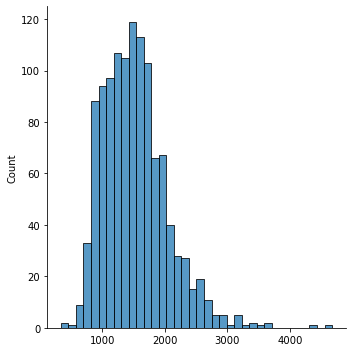

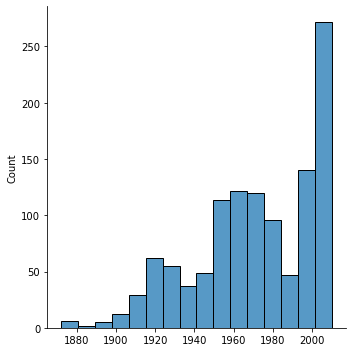

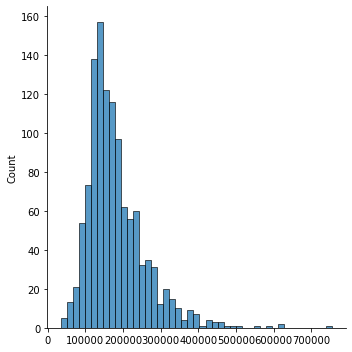

In [7]:
# 分布の確認

sns.displot(X_train[:, 0], kde=False)
sns.displot(X_train[:, 1], kde=False)

sns.displot(y_train, kde=False)

In [8]:
# 対数変換

X_train_log = np.log(X_train)
y_train_log = np.log(y_train)
X_val_log = np.log(X_val)
y_val_log = np.log(y_val)

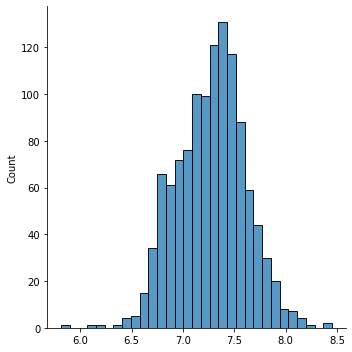

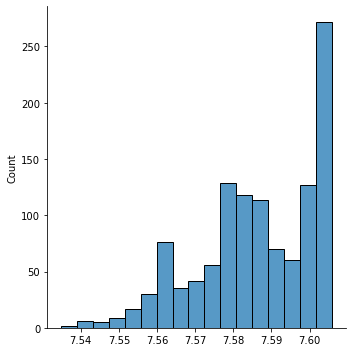

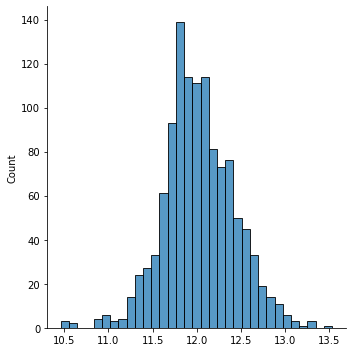

In [9]:
# 分布の再確認

sns.displot(X_train_log[:, 0], kde=False)
sns.displot(X_train_log[:, 1], kde=False)

sns.displot(y_train_log, kde=False)

In [10]:
# 線形回帰で学習、推定

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_log, y_train_log)
y_pred_linear_base = linear.predict(X_val_log)
y_pred_linear_base.shape


# 評価、MSEの算出

mean_squared_error(y_val_log, y_pred_linear_base)


# MSEを表にまとめる
df_mse = pd.DataFrame({'Linear_BASELINE': mean_squared_error(y_val_log, y_pred_linear_base)},
                      index=['MSE'])

In [11]:
# 決定木で学習、推定

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_log, y_train_log)
y_pred_tree_base = tree.predict(X_val_log)
y_pred_tree_base.shape


# 評価、MSEの算出

mean_squared_error(y_val_log, y_pred_tree_base)


# MSEを表にまとめる
df_mse = df_mse.assign(
    DecisionTree_BASELINE=[mean_squared_error(y_val_log, y_pred_tree_base)])

In [12]:
# ランダムフォレストで学習、推定

from sklearn.ensemble import RandomForestRegressor  # 回帰問題なのでRegressor
rf = RandomForestRegressor()
rf.fit(X_train_log, y_train_log)
y_pred_rf_base = rf.predict(X_val_log)

# 評価、MSEの算出

mean_squared_error(y_val_log, y_pred_rf_base)


# MSEを表にまとめる
df_mse = df_mse.assign(
    RandomForest_BASELINE=[mean_squared_error(y_val_log, y_pred_rf_base)])

In [13]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE
MSE,0.045906,0.074386,0.041667


ベースラインモデルは、

- 前処理を対数変換
- ハイパーパラメーターの調整は特に無し
- 手法は単一モデルとして線形回帰、決定木、ランダムフォレスト

をそれぞれ用意した。

**【別解】**

sklearnに用意されている`cross_val_score`を使う。

[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [14]:
from sklearn.model_selection import cross_val_score

estimator = [LinearRegression(), DecisionTreeRegressor(),
             RandomForestRegressor()]

#metrics = ['neg_mean_squared_error']

for model in estimator:
    # -cross_val_scoreにすることでMSEの結果が+で返ってくる
    result = -cross_val_score(model, X_train_log, y_train_log,
                              cv=5, scoring='neg_mean_squared_error')
    result_mean = np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), str(model))

CV_MSE_MEAN:0.046 LinearRegression()
CV_MSE_MEAN:0.080 DecisionTreeRegressor()
CV_MSE_MEAN:0.048 RandomForestRegressor()


[アンサンブル学習方法](https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E5%AD%A6%E7%BF%92%EF%BC%88ensemble-learning%EF%BC%89%E8%A7%A3%E8%AA%AC%E3%81%A8%E5%AE%9F%E9%A8%93/)

- バイアス(Bias)
推定値と実際値の平均的な違い。高いバイアス エラーは、性能が悪いモデルで、データ中の重要なトレンドを見逃す。

- バリアンス(Variance)
同じ観測で推定値の異なり具合。バリアンスが高いモデルは訓練データに当てはまりすぎて、訓練外では性能が悪い。

**高バイアス、低バリアンス：**
このような状況の場合、機械学習モデルは訓練データからしっかりと学習を行えていない可能性が高く、そのため予測値が実際値からずれ込んでいます。

**低バイアス、高バリアンス:**
このような状況の場合、機械学習モデルは「過学習」をしている可能性が高く、新しいデータを使った予測の精度が悪くなる傾向にあります。訓練データを学習しすぎてしまい、予測が訓練データと類似した結果となってしまいっている状態です。

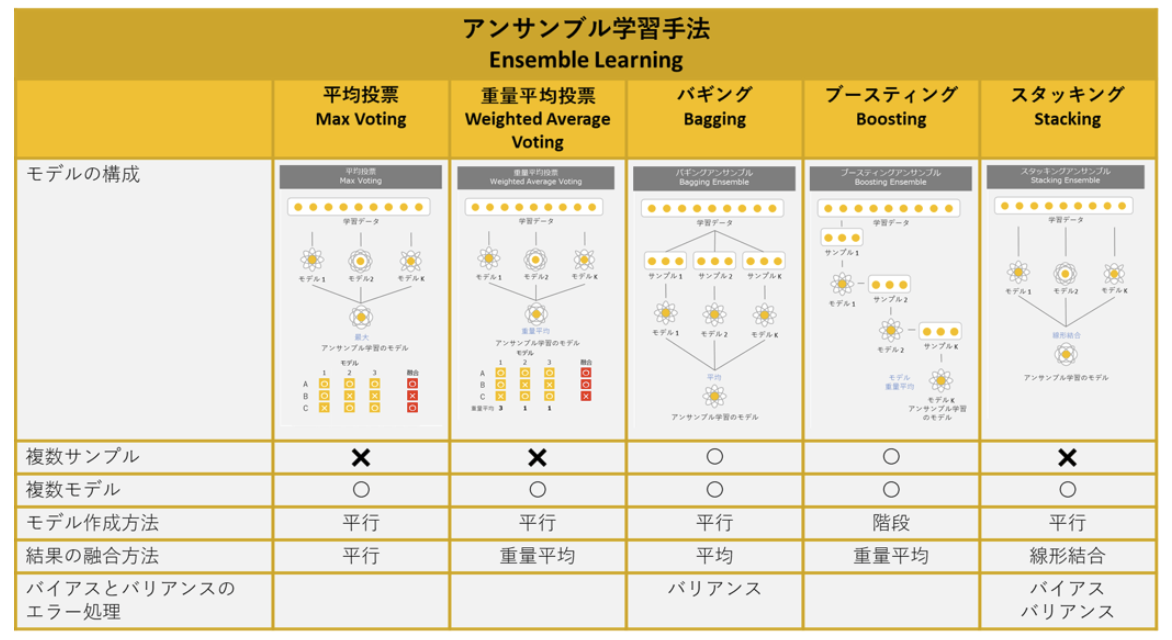

## ブレンディング

#### ブレンディングとは
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。

- 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）
- ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
- 手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）

重要なのはそれぞれのモデルが大きく異なることです。

回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。

分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。

[VotingClassifie](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

[アンサンブル学習（Ensemble learning）解説と実験](https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E5%AD%A6%E7%BF%92%EF%BC%88ensemble-learning%EF%BC%89%E8%A7%A3%E8%AA%AC%E3%81%A8%E5%AE%9F%E9%A8%93/)

### 【問題1】ブレンディングのスクラッチ実装

ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。

APIを使う手法もある。

[StackingとBlendingをheamy, Stacknetをpystacknetで高速に実現する](https://blog.ikedaosushi.com/entry/2018/12/15/212508)

#### モデル1：３つのモデル(線形回帰、決定木、ランダムフォレスト）を足してみる

In [15]:
model1 = LinearRegression().fit(X_train_log, y_train_log)
model2 = DecisionTreeRegressor().fit(X_train_log, y_train_log)
model3 = RandomForestRegressor().fit(X_train_log, y_train_log)

y_pred1 = model1.predict(X_val_log)
y_pred2 = model2.predict(X_val_log)
y_pred3 = model3.predict(X_val_log)

# 推定値を平均する
y_pred_blend1 = np.mean([y_pred1, y_pred2, y_pred3], axis=0)

# 評価
MSE = mean_squared_error(y_val_log, y_pred_blend1)

# MSEを表にまとめる
df_mse = df_mse.assign(
    Blend1=[mean_squared_error(y_val_log, y_pred_blend1)])

In [16]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1
MSE,0.045906,0.074386,0.041667,0.044487


**単体モデルで最も良かったランダムフォレストに太刀打ちできていない。。**

#### モデル２：上記のブレンドモデルのハイパーパラメータを調整してみる。更にあまり成績の良くない決定木を外してみる。

In [17]:
model1 = LinearRegression(fit_intercept=True, normalize=True).fit(
    X_train_log, y_train_log)
#model2 = DecisionTreeRegressor().fit(X_train_log, y_train_log)
model3 = RandomForestRegressor(max_depth=8, max_features='log2',
                               min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log)

y_pred1 = model1.predict(X_val_log)
#y_pred2 = model2.predict(X_val_log)
y_pred3 = model3.predict(X_val_log)

# 推定値を平均する
y_pred_blend2 = np.mean([y_pred1, y_pred3], axis=0)

# 評価
MSE = mean_squared_error(y_val_log, y_pred_blend2)

# MSEを表にまとめる
df_mse = df_mse.assign(
    Blend2=[mean_squared_error(y_val_log, y_pred_blend2)])

In [18]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1,Blend2
MSE,0.045906,0.074386,0.041667,0.044487,0.039283


**ランダムフォレスト単体モデルよりもMSEが下がった！！**

#### モデル３：上記モデルのクロスバリデーションをRepeatedKFoldに変更してみる

In [19]:
# 単一モデルでどれだけ上がるか確認

from sklearn.model_selection import RepeatedKFold

estimator = [LinearRegression(fit_intercept=True, normalize=True),
             RandomForestRegressor(max_depth=8, max_features='log2',
                                   min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log)]

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

for model in estimator:
    # -cross_val_scoreにすることでMSEの結果が+で返ってくる
    result = -cross_val_score(model, X_train_log, y_train_log,
                              cv=rkf, scoring='neg_mean_squared_error')
    result_mean = np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), str(model))

CV_MSE_MEAN:0.046 LinearRegression(normalize=True)
CV_MSE_MEAN:0.043 RandomForestRegressor(max_depth=8, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300)


In [20]:
model1 = LinearRegression(fit_intercept=True, normalize=True).fit(
    X_train_log, y_train_log)
model3 = RandomForestRegressor(max_depth=8, max_features='log2',
                               min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log)

y_pred1 = model1.predict(X_val_log)
y_pred3 = model3.predict(X_val_log)

# 推定値を平均する
y_pred_blend3 = np.mean([y_pred1, y_pred3], axis=0)

# 評価
MSE = mean_squared_error(y_val_log, y_pred_blend3)

# MSEを表にまとめる
df_mse = df_mse.assign(
    Blend3=[mean_squared_error(y_val_log, y_pred_blend3)])

In [21]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1,Blend2,Blend3
MSE,0.045906,0.074386,0.041667,0.044487,0.039283,0.039634


**わ、わずかに上がってしまった。一進一退。。**

#### モデル4：上記モデルのクロスバリデーションをStratifiedKFoldに戻して、LightGBMを追加してみる

In [23]:
# 単一モデルでの精度を確認

import lightgbm as lgb

lgbm = lgb.LGBMRegressor(objective='regression',
                         num_leaves=51,
                         learning_rate=0.1,
                         min_child_weight=15,
                         max_depth=50,
                         random_state=0)

lgbm.fit(X_train_log, y_train_log)

y_pred_lgb = lgbm.predict(X_val_log)

mse_lgb = mean_squared_error(y_val_log, y_pred_lgb)

mse_lgb

0.03933060766169854

In [24]:
model1 = LinearRegression(fit_intercept=True, normalize=True).fit(
    X_train_log, y_train_log)
model2 = RandomForestRegressor(max_depth=8, max_features='log2',
                               min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log)
model3 = lgb.LGBMRegressor(objective='regression', num_leaves=51, learning_rate=0.1,
                           min_child_weight=15, max_depth=50, random_state=0).fit(X_train_log, y_train_log)

y_pred1 = model1.predict(X_val_log)
y_pred2 = model2.predict(X_val_log)
y_pred3 = model3.predict(X_val_log)

# 推定値を平均する
y_pred_blend4 = np.mean([y_pred1, y_pred2, y_pred3], axis=0)

# 評価
MSE = mean_squared_error(y_val_log, y_pred_blend4)

# MSEを表にまとめる
df_mse = df_mse.assign(
    Blend4=[mean_squared_error(y_val_log, y_pred_blend4)])

In [25]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1,Blend2,Blend3,Blend4
MSE,0.045906,0.074386,0.041667,0.044487,0.039283,0.039634,0.038074


**LightGBMをモデルに組み込んでみたら、MSEがわずかに下がり、モデル精度が向上した。**

**次にクロスバリデーションをK-Foldに変えてみる。**

#### モデル5：クロスバリデーションを通常のK-Foldに変更してみる。

In [32]:
# 単一モデルでどれだけ上がるか確認

from sklearn.model_selection import KFold

from sklearn.model_selection import RepeatedKFold

estimator = [LinearRegression(fit_intercept=True, normalize=True),
             RandomForestRegressor(max_depth=8, max_features='log2',
                                   min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log),
             lgb.LGBMRegressor(objective='regression', num_leaves=51, learning_rate=0.1,
                               min_child_weight=15, max_depth=50, random_state=0).fit(X_train_log, y_train_log)]

kf = KFold(n_splits=5, random_state=None, shuffle=False)

for model in estimator:
    # -cross_val_scoreにすることでMSEの結果が+で返ってくる
    result = -cross_val_score(model, X_train_log, y_train_log,
                              cv=kf, scoring='neg_mean_squared_error')
    result_mean = np.mean(result)
    print('CV_MSE_MEAN:{:.3f}'.format(result_mean), str(model))

CV_MSE_MEAN:0.046 LinearRegression(normalize=True)
CV_MSE_MEAN:0.043 RandomForestRegressor(max_depth=8, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300)
CV_MSE_MEAN:0.047 LGBMRegressor(max_depth=50, min_child_weight=15, num_leaves=51,
              objective='regression', random_state=0)


In [33]:
model1 = LinearRegression(fit_intercept=True, normalize=True).fit(
    X_train_log, y_train_log)
model2 = RandomForestRegressor(max_depth=8, max_features='log2',
                               min_samples_leaf=2, min_samples_split=5, n_estimators=300).fit(X_train_log, y_train_log)
model3 = lgb.LGBMRegressor(objective='regression', num_leaves=51, learning_rate=0.1,
                           min_child_weight=15, max_depth=50, random_state=0).fit(X_train_log, y_train_log)

y_pred1 = model1.predict(X_val_log)
y_pred2 = model2.predict(X_val_log)
y_pred3 = model3.predict(X_val_log)

# 推定値を平均する
y_pred_blend5 = np.mean([y_pred1, y_pred2, y_pred3], axis=0)

# 評価
MSE = mean_squared_error(y_val_log, y_pred_blend5)
print(MSE)

# MSEを表にまとめる
df_mse = df_mse.assign(
    Blend5=[mean_squared_error(y_val_log, y_pred_blend5)])

0.037977609709415376


In [34]:
df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1,Blend2,Blend3,Blend4,Blend5
MSE,0.045906,0.074386,0.041667,0.044487,0.039283,0.039634,0.038074,0.037978


**クロスバリデーションを通常のK-Foldに変更してみたら、MSEがわずかに小さくなり、精度が向上した。**

#### まとめ

ベースモデルで最も精度が良かったのはランダムフォレストで、MSEは0.041667だった。
これよりも精度が良かったのが以下の３つのモデルであった。

In [35]:
progress_model = pd.DataFrame({'RandomForest_BASEMODEL': ['対数変換', '調整なし', 'StratifiedKFold', 'Linear, DecisionTree, RandomForest', '0.041667'],
                               'Blend2': ['対数変換', '調整あり', 'StratifiedKFold', 'Linear, RandomForest', '0.039283'],
                               'Blend4': ['対数変換', '調整あり', 'RepeatedKFold', 'Linear, RandomForest, LightGBM', '0.038074'],
                               'Blend5': ['対数変換', '調整あり', 'KFold', 'Linear, RandomForest, LightGBM', '0.037978']},
                              index=['前処理', 'ハイパーパラメーター', 'クロスバリデーション', 'モデル', 'MSE'])

progress_model

,RandomForest_BASEMODEL,Blend2,Blend4,Blend5
前処理,対数変換,対数変換,対数変換,対数変換
ハイパーパラメーター,調整なし,調整あり,調整あり,調整あり
クロスバリデーション,StratifiedKFold,StratifiedKFold,RepeatedKFold,KFold
モデル,"Linear, DecisionTree, RandomForest","Linear, RandomForest","Linear, RandomForest, LightGBM","Linear, RandomForest, LightGBM"
MSE,0.041667,0.039283,0.038074,0.037978


## バギング

### 【問題2】バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

#### バギングとは
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（ ブートストラップサンプル ）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。

scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

推定結果の平均をとる部分はブースティングと同様の実装になります。

In [55]:
n = 100
models = []

# n個の決定木がそれぞれ別々に学習を行う
for i in range(n):
    X_train_bag, X_, y_train_bag, y_ = train_test_split(
        X_train_log, y_train_log, train_size=0.2, shuffle=True)
    model = DecisionTreeRegressor()
    model.fit(X_train_bag, y_train_bag)
#n個の決定木が出した学習結果をリストとして保管
    models.append(model)



#予測値を保管しておくリストを作成。
#初期値を0としてあるのは、ここにn個の決定木が出した結果が蓄積されて行くから
y_pred_bag1 = np.zeros(len(X_val_log))

#n個の決定木が出した予測値を、足してゆく
for regr in models:
    pred = regr.predict(X_val_log)
    y_pred_bag1 = y_pred_bag1 + pred
    
#n個の決定木が出した予測値が全て足されたリストがで出てきているので、
#最後に決定木の数で平均をとることで、多数決をとることと同じ意味を果たす
y_pred_bag1 = y_pred_bag1/n


# 評価
MSE = mean_squared_error(y_val_log, y_pred_bag1)
print('MSE:{}'.format(MSE))

MSE:0.03773483135029635


In [57]:
# MSEを表にまとめる
df_mse = df_mse.assign(
    Bagging１=[mean_squared_error(y_val_log, y_pred_bag1)])

df_mse

,Linear_BASELINE,DecisionTree_BASELINE,RandomForest_BASELINE,Blend1,Blend2,Blend3,Blend4,Blend5,Bagging1
MSE,0.045906,0.074386,0.041667,0.044487,0.039283,0.039634,0.038074,0.037978,0.037735


**単一モデルよりも改善がみられた。**

## スタッキング

### 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

#### スタッキングとは
スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは $K_0=3, M_0=2$ 程度にします。

**《学習時》**

1. （ステージ $0$ ）

- 学習データを $K_0$ 個に分割する。
- 分割した内の $(K_0 - 1)$ 個をまとめて学習用データ、残り $1$ 個を推定用データとする組み合わせが $K_0$ 個作れる。
- あるモデルのインスタンスを $K_0$ 個用意し、異なる学習用データを使い学習する。
- それぞれの学習済みモデルに対して、使っていない残り $1$ 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
- さらに、異なるモデルのインスタンスも $K_0$ 個用意し、同様のことを行う。モデルが $M_0$ 個あれば、 $M_0$ 個のブレンドデータが得られる。


2. （ステージ $n$ ）

- ステージ $n-1$ のブレンドデータを$M_{n-1}$ 次元の特徴量を持つ学習用データと考え、 $K_n$ 個に分割する。以下同様である。

3. （ステージ $N$ ）＊最後のステージ
-  ステージ $N-1$ の $M_{N-1}$ 個のブレンドデータを$M_{N-1}$ 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。



**《推定時》**

1. （ステージ $0$ ）

- テストデータを $K_0×M_0$ 個の学習済みモデルに入力し、$K_0×M_0$ 個の推定値を得る。これを $K_0$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）


2. （ステージ $n$ ）

- ステージ $n-1$ で得たブレンドテストを $K_n×M_n$ 個の学習済みモデルに入力し、$K_n×M_n$ 個の推定値を得る。これを $K_n$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

3. （ステージ $N$ ）＊最後のステージ

- ステージ $N-1$ で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [ ]:
K = 5
# 学習用フェーズ1層目
kf = KFold(n_splits=K, shuffle=True, random_state=None)
m_instance_list = []
va_index = []
count = 0
for train_index, valid_index, in kf.splits(X_train_log):
    train_x, valid_x = X_train_log[train_index], X_train_log[valid_index]
    train_y, valid_y = y_train_log[train_index], y_train_log[valid_index]
    
    #線形回帰
    linear = LinearRegression()
    linear.fit(train_x, train_y)
    linear.pred = linear.predict(valid_x)
    
    #決定木
    tree = DecisionTreeRegressor()
    tree.fit(train_x, train_y)
    tree.pred = tree.predict(valid_x)
    
    #ランダムフォレスト
    rf = RandomForestRegressor()
    rf.fit(train_x, train_y)
    rf.pred = rf.predict(valid_x)
    
    #インスタンスの保存
    m_instance_list.append(linear)
    m_instance_list.append(tree)
    m_instance_list.append(rf)
    
    #valのindexの保存
    va_index.appendend(valid_index)
    
    #ブレンドデータの作成
    
    

[スタッキング](http://segafreder.hatenablog.com/entry/2016/05/24/235822)